# Predicting Churn of Telecommunications Customers 

Churn is a one of the biggest problem for companies that provide subscription based services especially in  the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%. The Churn Prediction modeling project aims to identify customers likely to cancel their subscriptions or stop using a service. Utilizing a dataset with various customer attributes and their churn status, this project employs machine learning techniques to predict churn probability. The insights gained from the analysis will enable the development of targeted strategies to improve customer retention and reduce turnover rates.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
#Let's load our dataset
df = pd.read_csv('churn.csv')
print(df.head())

df.info()

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService   
0  7590-VHVEG  Female              0     Yes         No       1           No  \
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection   
0  No phone service             DSL             No  ...               No  \
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      f

# Exploratory Data Analysis
Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

In [4]:
sns.set_style("whitegrid")

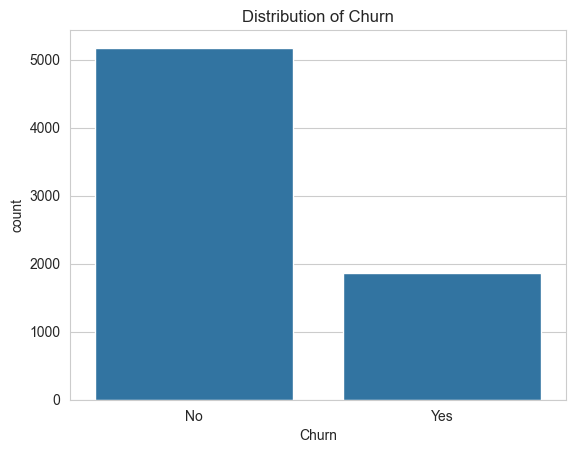

1869
5174


In [5]:
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

print(sum(df['Churn']=='Yes'))
print(sum(df['Churn']=='No'))

In our data, about 73% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

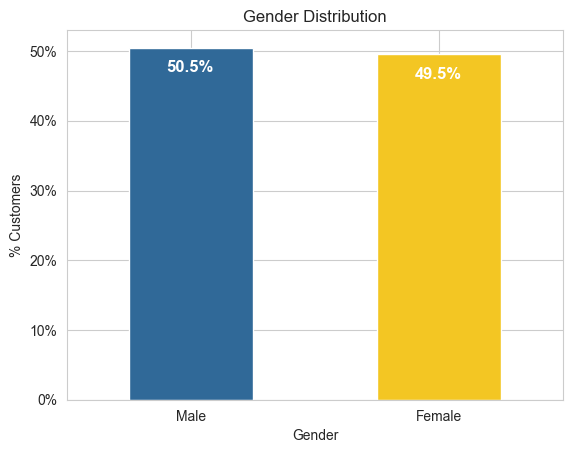

In [6]:
#GENDER DISTRIBUTION

colors = ['#306998', '#f3c623'] 

ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

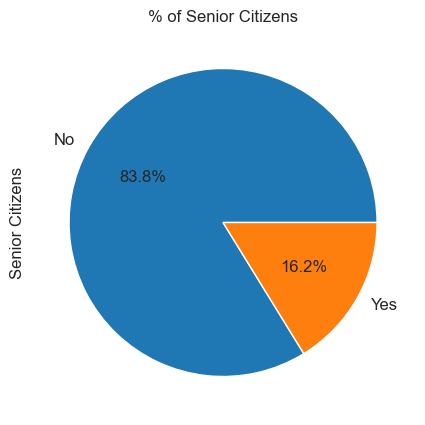

In [7]:
#Senior Citizens

ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Text(0.5, 1.0, '# of Customers by Contract Type')

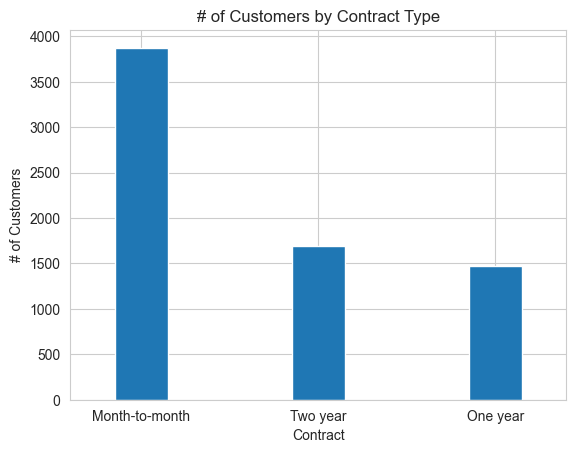

In [8]:
#Contract type

ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')




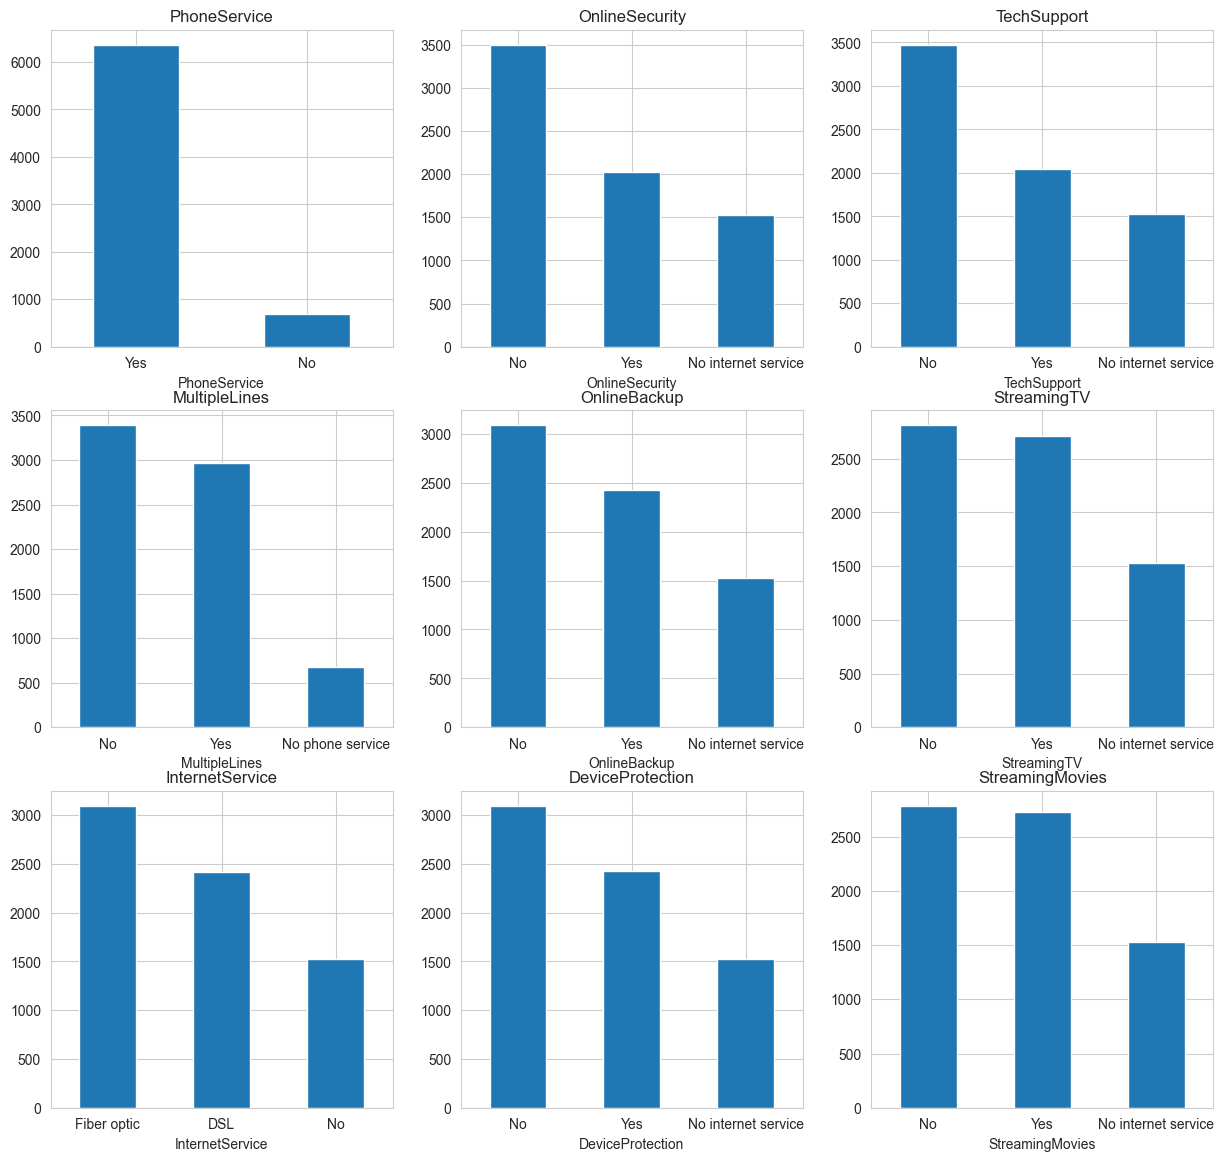

In [9]:
#Types of services used

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,14))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

In [10]:
# Convert 'TotalCharges' to numeric, forcing non-numeric values to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# filling missing values in 'TotalCharges' with its median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [11]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute medians for numerical columns only
medians = df[numerical_cols].median()

# Fill missing values in numerical columns with their respective medians
df[numerical_cols] = df[numerical_cols].fillna(medians)

In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Churn')  

# one-hot encoding on categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df)

      SeniorCitizen  tenure  MonthlyCharges  TotalCharges Churn   
0                 0       1           29.85         29.85    No  \
1                 0      34           56.95       1889.50    No   
2                 0       2           53.85        108.15   Yes   
3                 0      45           42.30       1840.75    No   
4                 0       2           70.70        151.65   Yes   
...             ...     ...             ...           ...   ...   
7038              0      24           84.80       1990.50    No   
7039              0      72          103.20       7362.90    No   
7040              0      11           29.60        346.45    No   
7041              1       4           74.40        306.60   Yes   
7042              0      66          105.65       6844.50    No   

      customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF   
0                     False                  False                  False  \
1                     False              

In [13]:
# Convert 'Churn' to numeric: 1 for 'Yes' and 0 for 'No'
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

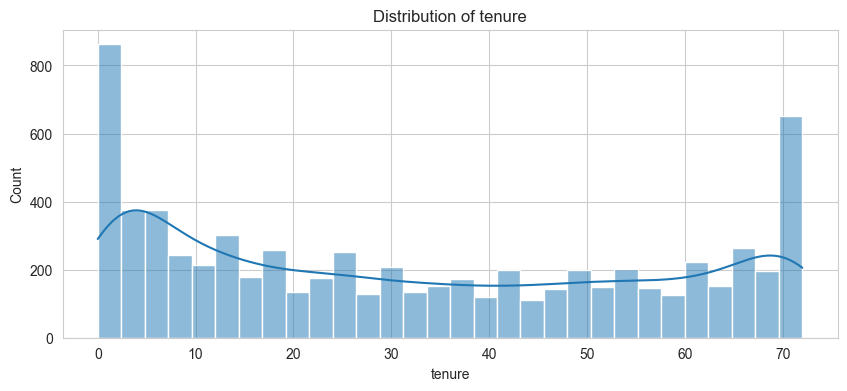

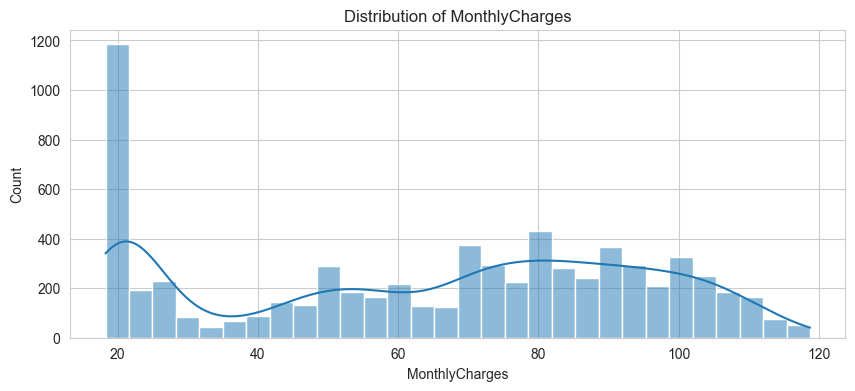

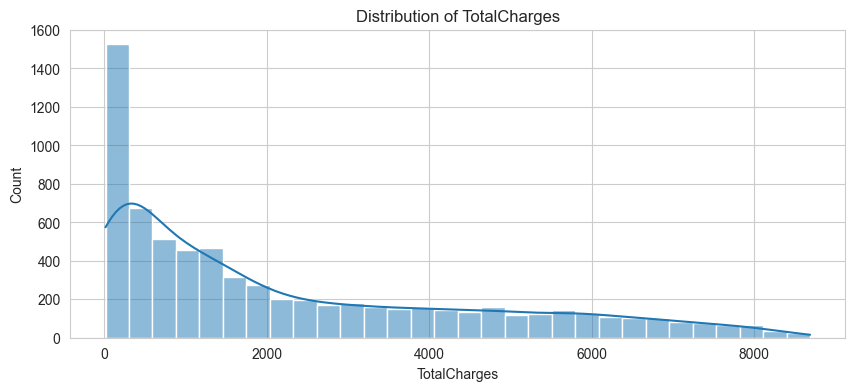

In [14]:
# Plot distributions of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

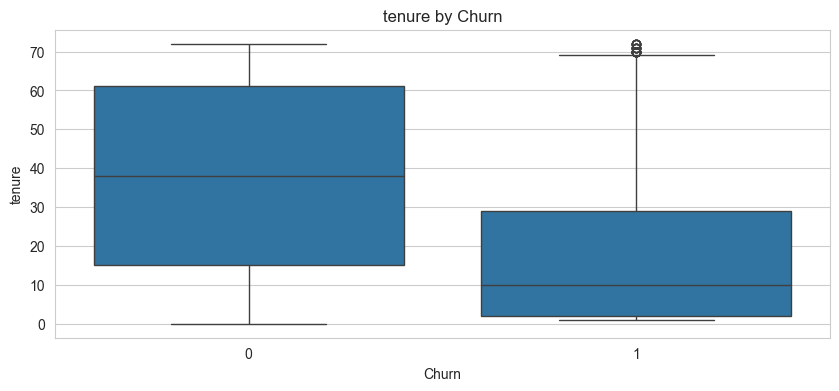

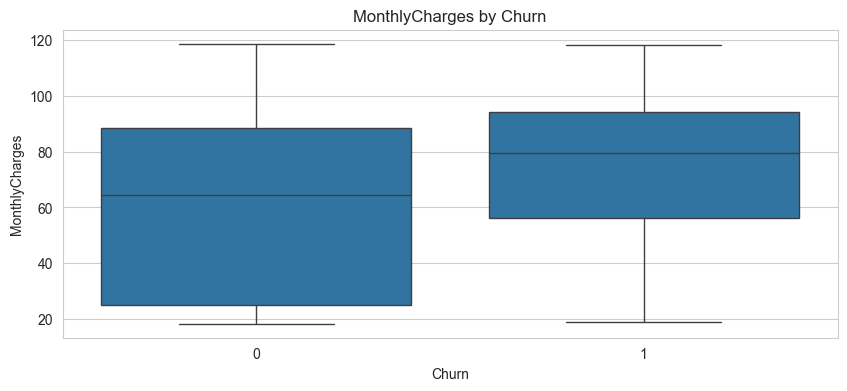

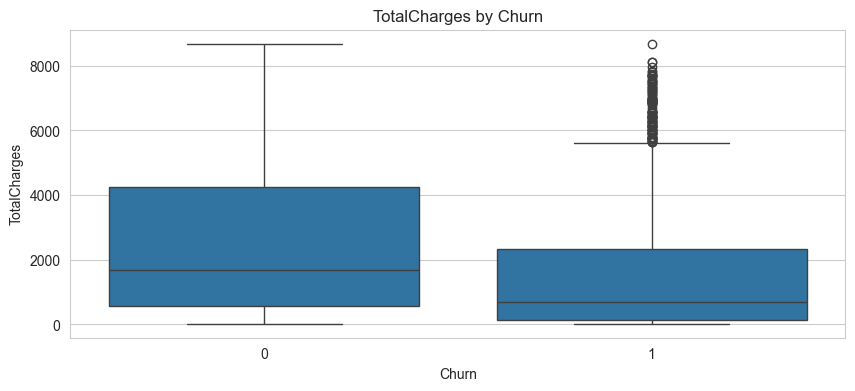

In [15]:
#Churn based on numerical features

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} by Churn')
    plt.show()

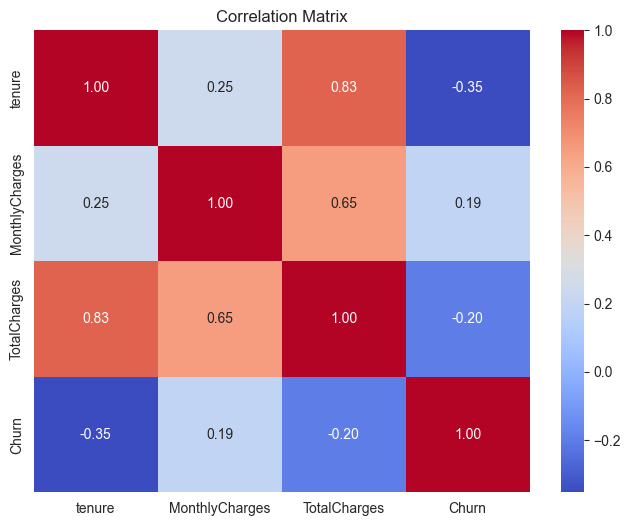

In [16]:
# Compute the correlation matrix including the now numeric 'Churn' column
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()

# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Analyzing the dataset reveals several factors affecting churn rates, including:**
  - **Service Features:** Customers without essential services like online security or tech support are more likely to churn.
  - **Contract Type:** Month-to-month contracts correlate with higher churn rates compared to long-term contracts.
  - **Monthly Charges:** Higher charges are associated with increased churn likelihood.

**After analyzing the data, potential strategies to reduce churn rates include:**
- **Enhanced Services:** Offer comprehensive service packages including security and support.
- **Contract Incentives:** Encourage longer-term contracts with incentives or discounts.
- **Pricing Strategy:** Consider flexible pricing options or targeted discounts to mitigate churn risk.


# Machine Learning
After going through the above EDA we will develop some predictive models and compare them.

We will develop Logistic Regression,Decision Trees and Random Forest(Ensemble for Decision Trees) and an Ensemble(for Logistic Regression and Random Forest)

In [17]:
#Removing missing values 
df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


Entropy for Dependents_Yes is 0.8138698129571506
Entropy for 2 yr contract is 0.7473476148626552
Entropy for 1 yr contract is 0.8086821321369387


C:\Users\yashg\AppData\Local\Temp\ipykernel_24580\2732323021.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(columns, rotation=45)


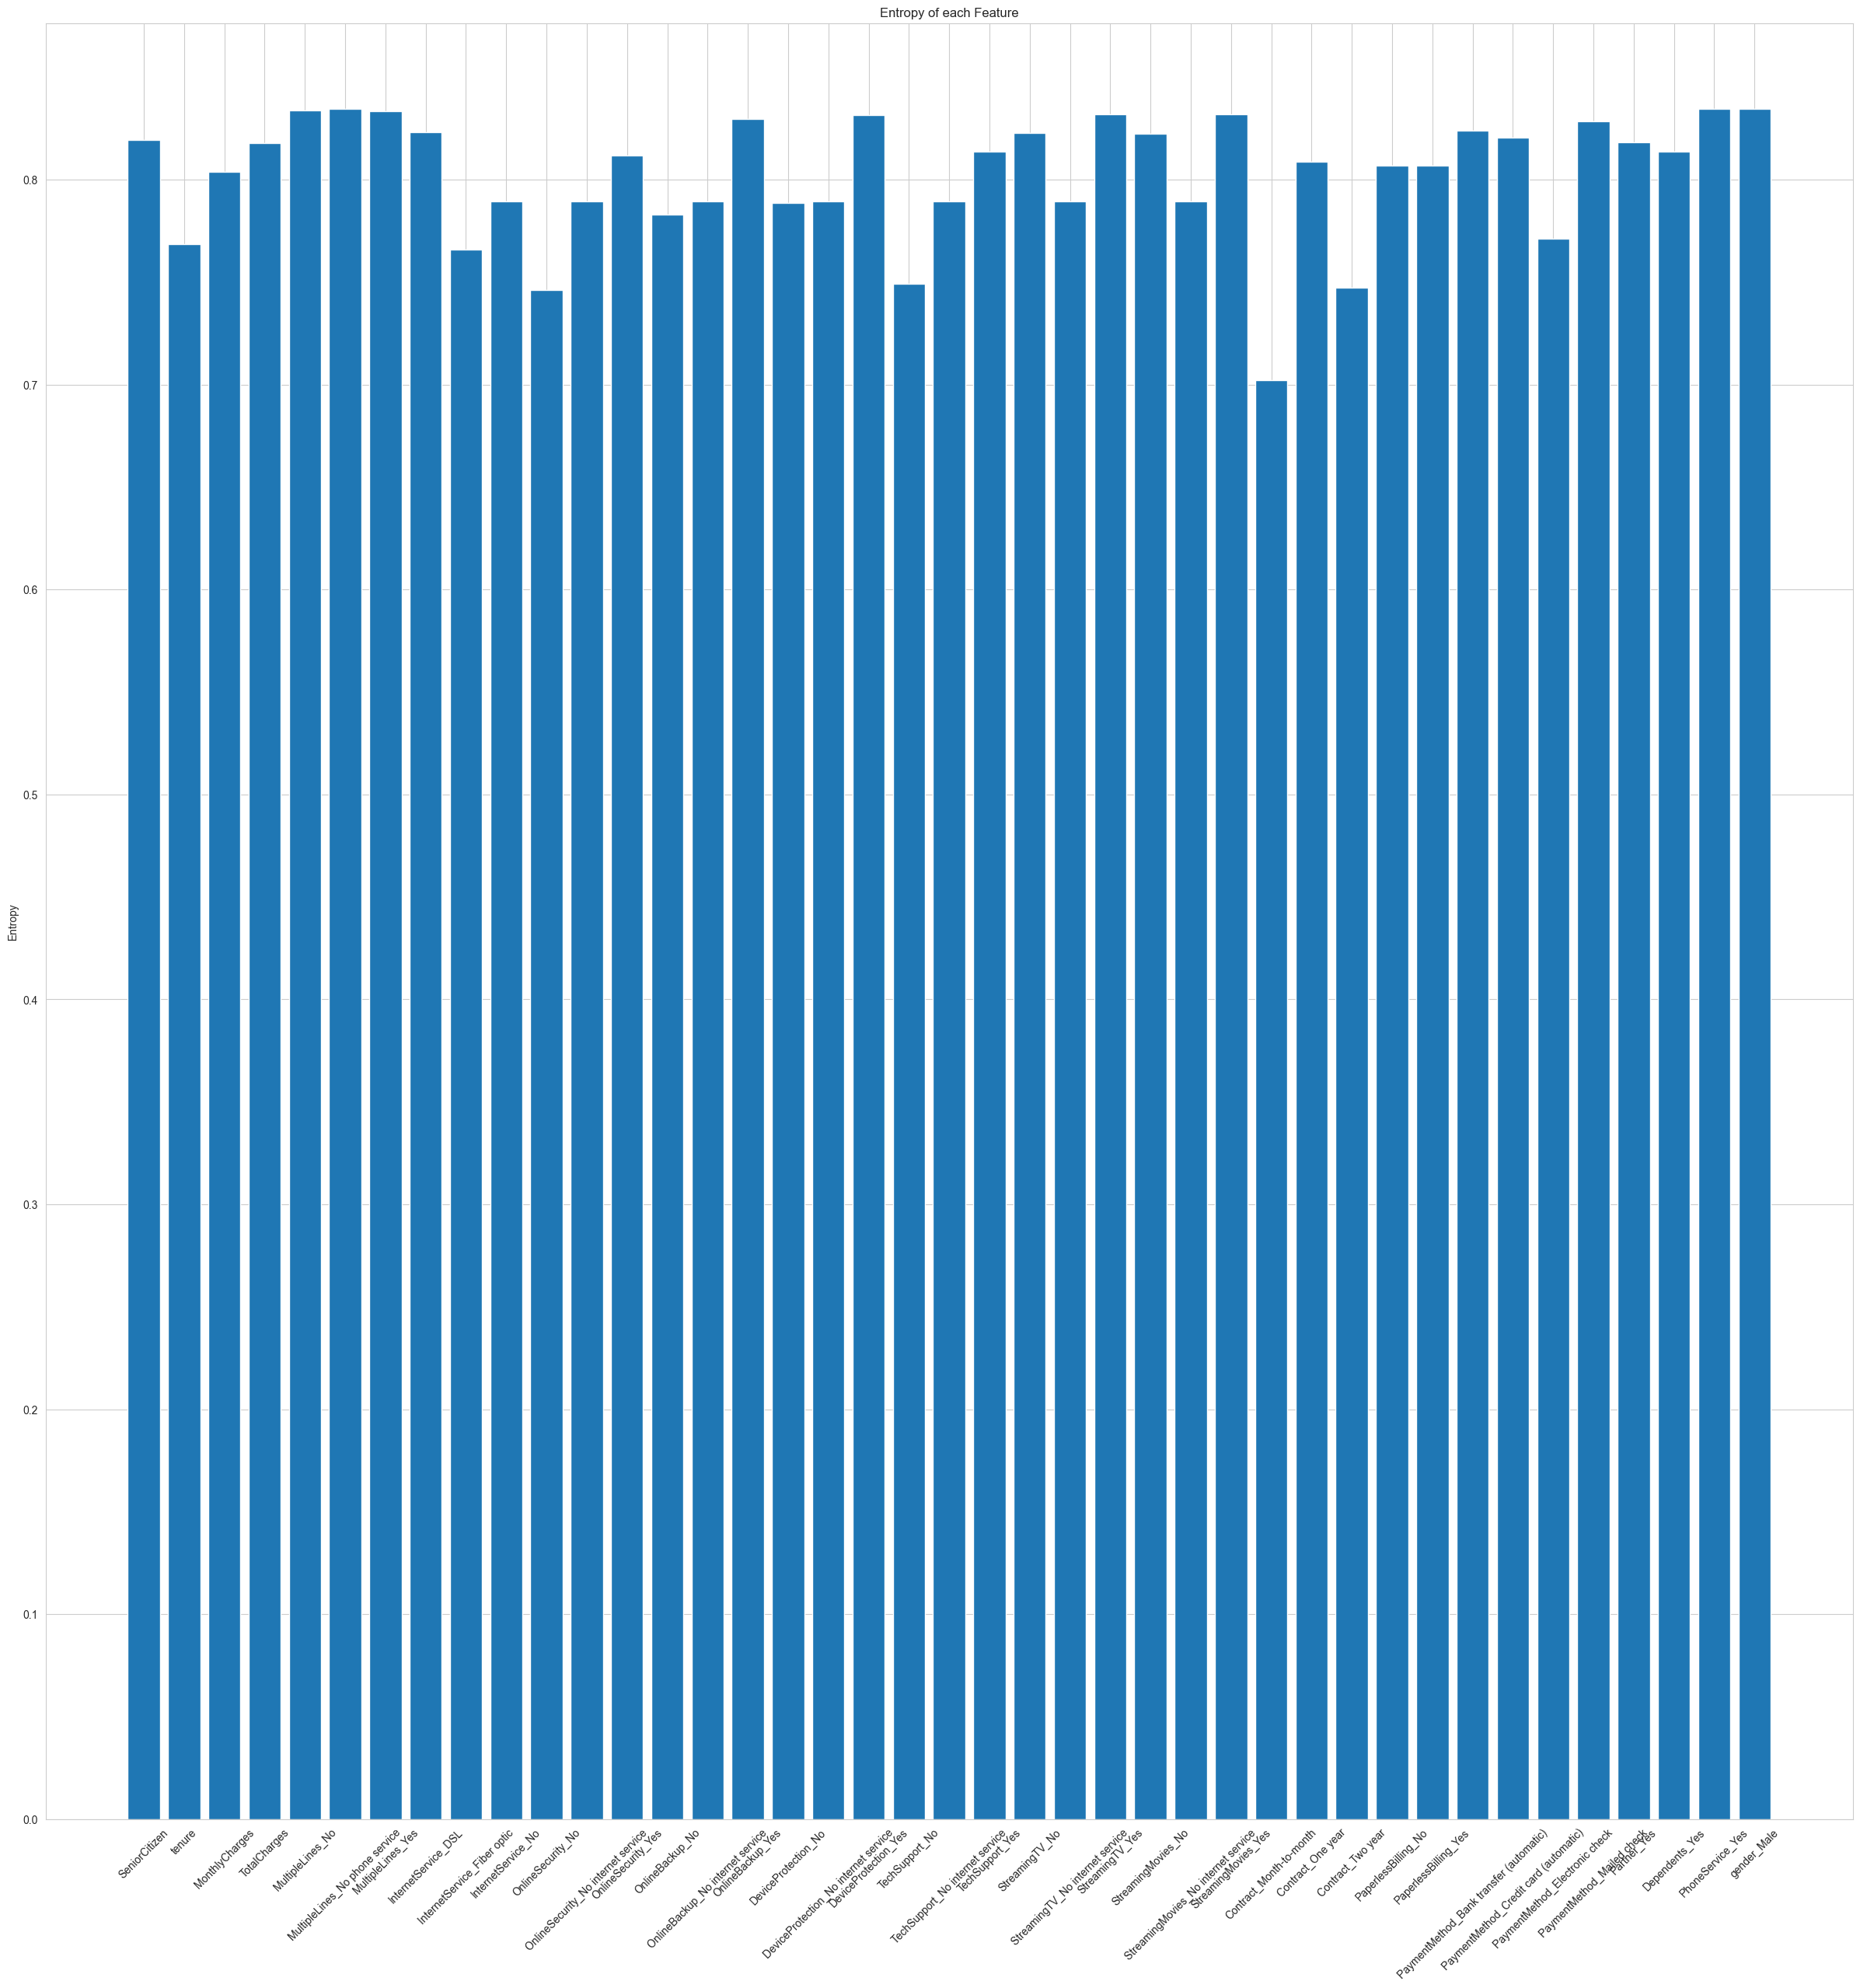

In [18]:
# Entropy calculations
# Calculate and plot entropy for all features after turning all features into binary

import matplotlib.pyplot as plt

def calcE(X, Y):
    # calculate avg weighted entropy for a vector X
    # print('Shape of X is ', np.shape(X), 'length of X is', len(X))
    epsilon = .0000001
    E = 0
    x0_y0 = 0
    x0_y1 = 0
    x1_y0 = 0
    x1_y1 = 0
    x0 = sum(X==0)
    x1 = sum(X==1)
    for i in range(0,np.shape(X)[0]):
        if X[i] == 0:
            if Y[i] == 0:
                x0_y0+=1
            else:
                x0_y1+=1
        else:
            if Y[i] == 1:
                x1_y0+=1
            else:
                x1_y1+=1
    if len(X) == 0 | x0 == 0 | x1 == 0:
        E = 5
    else:
        if x0 > 0:
            E0 = (x0/len(X))*( -1*(x0_y0/x0)*np.log2(x0_y0/x0 + epsilon) - (x0_y1/x0)*np.log2(x0_y1/x0 + epsilon))
        else:
            E0 = 1
        if x1 > 0:
            E1 = (x1/len(X))*( -1*(x1_y0/x1)*np.log2(x1_y0/x1 + epsilon) - (x1_y1/x1)*np.log2(x1_y1/x1 + epsilon))
        else:
            E1 = 1
        if max(E0, E1) >= 1:
            E = 1
        else:
            E = E0 + E1
    return E

def DTpreprocess(delete=0):
    # print('Delete is ', delete)
    df = pd.read_csv('churn.csv')
    df = df.drop(columns = ['customerID'])
    # Convert all data to numeric
    df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce') # Convert 'TotalCharges' to numeric, forcing non-numeric values to NaN
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    medians = df[numerical_cols].median()
    # Fill missing values in numerical columns with their respective medians
    df[numerical_cols] = df[numerical_cols].fillna(medians)
    categorical_cols = df.select_dtypes(include=['object']).columns.drop(['Partner', 'Dependents', 'PhoneService', 'gender'])
    df = pd.get_dummies(df, columns=categorical_cols) # one-hot encoding on categorical columns
    df = pd.get_dummies(df, columns=['Partner', 'Dependents', 'PhoneService', 'gender'], drop_first=True) # change Yes/No columns to bools
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype('int')
    X = df.drop(columns = ['Churn']).to_numpy()
    Y = df['Churn'].to_numpy()
    cols = list(df.columns.drop('Churn'))
    m = np.atleast_2d(np.mean(X, axis=0)) # find mean of each column
    X = X - m
    X[X > 0] = 1 # turn all features into binary features
    X[X <= 0] = 0
    return X, Y, cols

X, Y, columns = DTpreprocess()

E=calcE(df['Dependents_Yes'], df['Churn'])
print('Entropy for Dependents_Yes is', E)

E_2yr=calcE(df['Contract_Two year'], df['Churn'])
print('Entropy for 2 yr contract is', E_2yr)

E_1yr=calcE(df['Contract_One year'], df['Churn'])
print('Entropy for 1 yr contract is', E_1yr)

entropy = []
for i in range(0,X.shape[1]):
    E=calcE(X[:,i],Y)
    entropy.append(E)

# Plot entropy of all features
fig = plt.figure(figsize=(30, 30))
axes = fig.add_subplot()
axes.bar(columns, entropy)
axes.set_ylabel('Entropy')
axes.set_xticklabels(columns, rotation=45)
axes.set_title('Entropy of each Feature')
plt.show()


C:\Users\yashg\AppData\Local\Temp\ipykernel_24580\859333456.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(c, rotation=45)


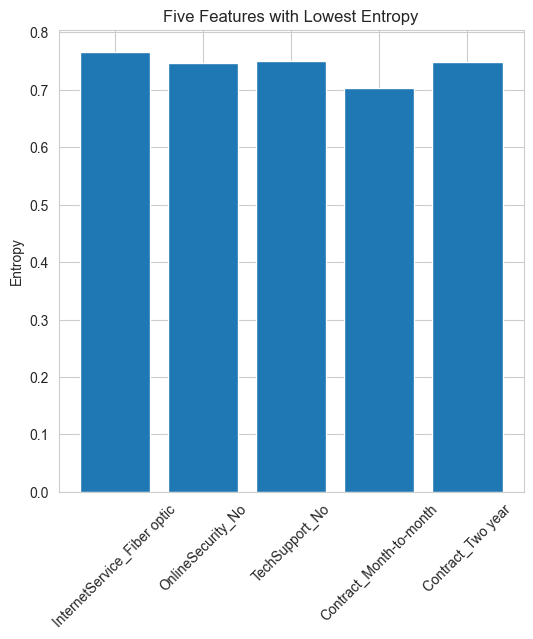

In [19]:
#Plot the five features with lowest entropy

fig = plt.figure(figsize=(6, 6))
axes = fig.add_subplot()
ind = np.argsort(entropy)[5:]
c=np.delete(columns, ind)
e=np.delete(entropy, ind)
axes.bar(c, e)
axes.set_ylabel('Entropy')
axes.set_xticklabels(c, rotation=45)
axes.set_title('Five Features with Lowest Entropy')
plt.show()


**LOGISTIC REGRESSION:**

Logistic Regression model accuracy: 0.80
Precision: 0.67
Recall: 0.53
F-Measure: 0.59


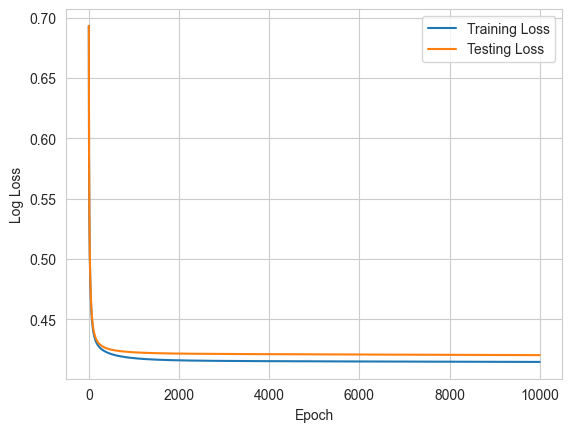

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


df = pd.read_csv('churn.csv')  
df = df.drop(columns=['customerID'])
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)
categorical_cols = df.select_dtypes(include=['object']).columns.drop(['Partner', 'Dependents', 'PhoneService', 'gender'])
df = pd.get_dummies(df, columns=categorical_cols) # one-hot encoding on categorical columns
df = pd.get_dummies(df, columns=['Partner', 'Dependents', 'PhoneService', 'gender'], drop_first=True) # change Yes/No columns to bools
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype('int')
X = df.drop(columns = ['Churn'])
# X = df[['SeniorCitizen','StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No']]
X = X.iloc[:,:]
y = df['Churn']

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


def logistic_regression(X, y, X_t, y_t, weights, learning_rate, iterations):
    log_loss_history = []
    log_loss_history_t = []
    for i in range(iterations):
        z = np.dot(X, weights)
        z_t = np.dot(X_t, weights)
        h = sigmoid(z)
        h_t = sigmoid(z_t)
        loss = cost_function(h, y)
        loss_t = cost_function(h_t, y_t)
        gradient = np.dot(X.T, (h - y)) / y.size
        weights -= learning_rate * gradient
        log_loss_history.append(loss)
        log_loss_history_t.append(loss_t)
        # if i % 100 == 0:
        #     print('Epoch is', i)
    return weights, log_loss_history, log_loss_history_t

def predict(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z) >= 0.5

def compute_metrics(y_true, predictions):
    TP = ((y_true == 1) & (predictions == 1)).sum()
    FP = ((y_true == 0) & (predictions == 1)).sum()
    FN = ((y_true == 1) & (predictions == 0)).sum()
    precision = TP / (TP + FP) if TP + FP else 0
    recall = TP / (TP + FN) if TP + FN else 0
    f_measure = 2 * precision * recall / (precision + recall) if precision + recall else 0
    return precision, recall, f_measure


def plot_loss(train_log_loss, test_log_loss):
    plt.plot(train_log_loss, label="Training Loss")
    plt.plot(test_log_loss, label="Testing Loss")  
    plt.xlabel("Epoch")
    plt.ylabel("Log Loss")
    plt.legend()
    plt.show()

weights = np.zeros(X_train.shape[1])
learning_rate = 0.1
iterations = 10000

weights, train_log_loss, test_log_loss = logistic_regression(X_train, y_train, X_test, y_test, weights, learning_rate, iterations)
predictions = predict(X_test, weights)
test_predictions = sigmoid(np.dot(X_test, weights))
accuracy = (predictions == y_test).mean()
precision, recall, f_measure = compute_metrics(y_test, predictions)

print(f'Logistic Regression model accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-Measure: {f_measure:.2f}')

plot_loss(train_log_loss, test_log_loss)

   


**DECISION TREE:**

Delete is  0
Overall accuracy of validation data is  0.7298679164891351
Confusion Matrix

[[0.72986792 0.27013208]
 [0.         0.        ]]
Delete is  20
Overall accuracy of validation data is  0.7818491691521091
Confusion Matrix

[[0.62760971 0.11589263]
 [0.1022582  0.15423945]]
Delete is  35
Overall accuracy of validation data is  0.7916489135066042
Confusion Matrix

[[0.67149553 0.1499787 ]
 [0.05837239 0.12015339]]


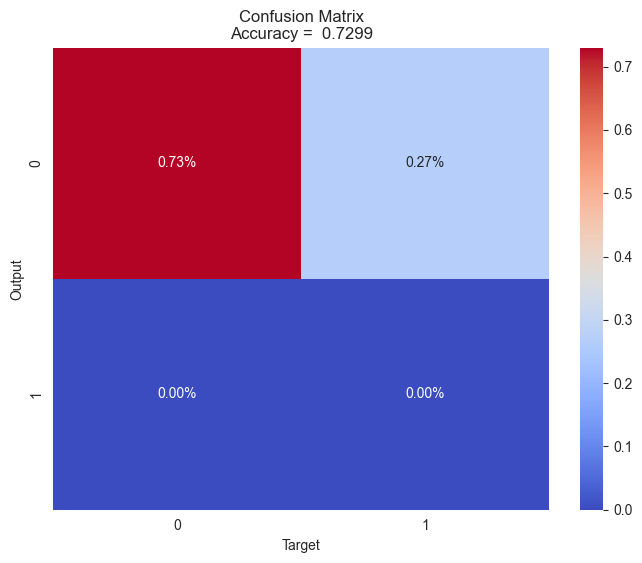

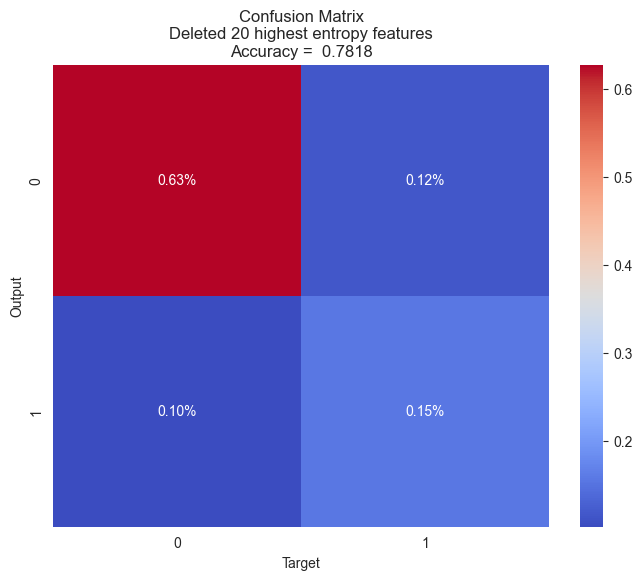

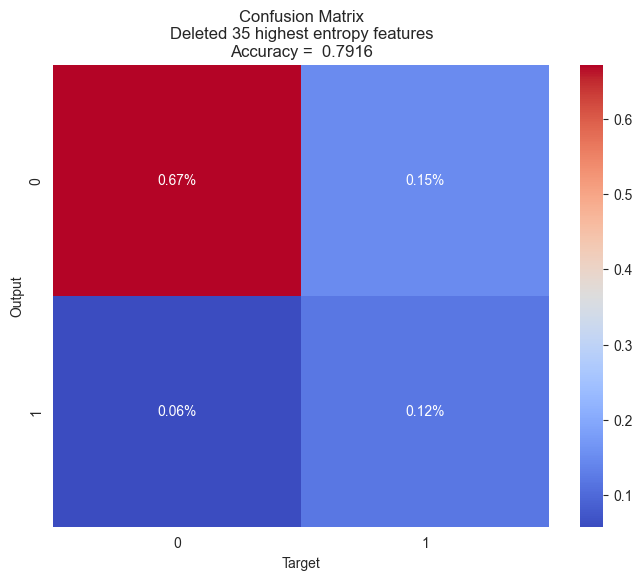

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

rng = np.random.default_rng(seed=0)

# Decision Tree Preprocessing
def DTpreprocess(delete=0):
    print('Delete is ', delete)
    df = pd.read_csv('churn.csv')
    df = df.drop(columns = ['customerID'])
    # Convert all data to numeric
    df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce') # Convert 'TotalCharges' to numeric, forcing non-numeric values to NaN
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    medians = df[numerical_cols].median()
    # Fill missing values in numerical columns with their respective medians
    df[numerical_cols] = df[numerical_cols].fillna(medians)
    categorical_cols = df.select_dtypes(include=['object']).columns.drop(['Partner', 'Dependents', 'PhoneService', 'gender'])
    df = pd.get_dummies(df, columns=categorical_cols) # one-hot encoding on categorical columns
    df = pd.get_dummies(df, columns=['Partner', 'Dependents', 'PhoneService', 'gender'], drop_first=True) # change Yes/No columns to bools
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype('int')
    X = df.drop(columns = ['Churn']).to_numpy()
    Y = df['Churn'].to_numpy()
    cols = list(df.columns.drop('Churn'))
    X_train, X_val, Y_train, Y_val = custom_train_test_split(X=X, y=Y, test_size=1/3)
    m = np.atleast_2d(np.mean(X_train, axis=0)) # find mean of each column
    X_train = X_train - m
    X_train[X_train > 0] = 1 # turn all features into binary features
    X_train[X_train <= 0] = 0
    X_val = X_val - m # convert to binary features using training data means
    X_val[X_val > 0] = 1 # turn all features into binary features
    X_val[X_val <= 0] = 0
    # Delete features with the highest entropy
    entropy = []
    for i in range(0,X_train.shape[1]):
        E=calcE(X_train[:,i],Y_train)
        entropy.append(E)
    ind=np.argsort(entropy)[-delete:]
    X_train= np.delete(X_train, ind, axis=1)
    X_val= np.delete(X_val, ind, axis=1)
    cols = np.delete(cols, ind)
    return X_train, X_val, Y_train, Y_val, cols

def custom_train_test_split(X, y, test_size=1/3, random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# DECISION TREE algorithm

def DTmain(X_train, Y_train, X_val, Y_val, features, d_num):
    myTree = myDT(X_t=X_train, Y_t=Y_train, f=features, X_v=X_val, Y_v=Y_val)
    acc, Y_val_final, Y_val_hat_final = myTree.getFinalAccuracy()
    print('Overall accuracy of validation data is ', acc)
    print('Confusion Matrix\n')
    class0 = Y_val_final[Y_val_hat_final==0]
    class1 = Y_val_final[Y_val_hat_final==1]
    row1 = np.array([sum(class0==0), sum(class0==1)])
    row2 = np.array([sum(class1==0), sum(class1==1)])
    confusion_matrix = np.vstack([row1, row2])/X_val.shape[0]
    print(confusion_matrix)
    plt.figure(figsize=(8, 6))
    ax = sn.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='2.2f')
    for t in ax.texts: t.set_text(t.get_text() + "%")
    if d_num > 0:
        str_title = "Confusion Matrix\nDeleted %.0f highest entropy features\nAccuracy =  %.4f" % (d_num, acc)
    else:
        str_title = "Confusion Matrix\nAccuracy =  %.4f" % acc
    # sn.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    # plt.title('Confusion Matrix\nDeleted ' + str(d_num) + ' highest entropy features\nAccuracy = ' + str(acc))
    plt.title(str_title)
    plt.ylabel('Output')
    plt.xlabel('Target')

def calcE(X, Y):
    # calculate avg weighted entropy for a vector X
    # print('Shape of X is ', np.shape(X), 'length of X is', len(X))
    epsilon = .0000001
    E = 0
    x0_y0 = 0
    x0_y1 = 0
    x1_y0 = 0
    x1_y1 = 0
    x0 = sum(X==0)
    x1 = sum(X==1)
    for i in range(0,np.shape(X)[0]):
        if X[i] == 0:
            if Y[i] == 0:
                x0_y0+=1
            else:
                x0_y1+=1
        else:
            if Y[i] == 1:
                x1_y0+=1
            else:
                x1_y1+=1
    # print(x0_y1, x0_y2, x1_y1, x1_y2)
    if len(X) == 0 | x0 == 0 | x1 == 0:
        E = 5
    else:
        if x0 > 0:
            E0 = (x0/len(X))*( -1*(x0_y0/x0)*np.log2(x0_y0/x0 + epsilon) - (x0_y1/x0)*np.log2(x0_y1/x0 + epsilon))
        else:
            E0 = 1
        if x1 > 0:
            E1 = (x1/len(X))*( -1*(x1_y0/x1)*np.log2(x1_y0/x1 + epsilon) - (x1_y1/x1)*np.log2(x1_y1/x1 + epsilon))
        else:
            E1 = 1
        if max(E0, E1) >= 1:
            E = 1
        else:
            E = E0 + E1
    # print(x0, x1, len(X))
    # print(E0, E1, E)
    return E

def myDT(X_t, Y_t, f, X_v, Y_v):
    if np.shape(X_t)[0] == 0:
        y_hat = 0
        prob_default = np.array([1,0])
        Y_val_hat = np.ones(np.shape(Y_v))
        newLeaf = Node(Y_v=Y_v, Y_v_hat=Y_val_hat, classEstimates=y_hat)
        return newLeaf
    elif len(set(Y_t))==1:
        y_hat = Y_t[0]
        Y_val_hat = y_hat*np.ones(np.shape(Y_v))
        newLeaf = Node(Y_v=Y_v, Y_v_hat=Y_val_hat, classEstimates=y_hat)
        return newLeaf
    elif len(f) == 0:
        if len(Y_t) == 0:
            prob = np.array([1,0])
        else:
            prob0 = sum(Y_t==0)/len(Y_t)
            prob1 = sum(Y_t==1)/len(Y_t)
            prob = np.array([prob0, prob1])
        y_hat = np.argmax(prob)
        Y_val_hat = y_hat*np.ones(np.shape(Y_v))
        newLeaf = Node(Y_v=Y_v, Y_v_hat=Y_val_hat, classEstimates=y_hat)
        return newLeaf
    else:
        # Find best feature
        options = np.zeros(np.shape(X_t)[1]) # row vector for entropies
        for i in range(0,len(options)):
            options[i] = calcE(X=X_t[:,i], Y=Y_t) # calculate avg weighted entropy for each feature
        choice = np.argmin(options)
        tree = Node(feature=f[choice], entropy= options[choice] )
        # Split X and Y into X_feature == true and X_feature == false
        X_t_feature = X_t[:,choice]
        X_v_feature = X_v[:,choice]
        X_t_new=np.delete(X_t, choice, 1)
        X_v_new = np.delete(X_v, choice, 1)
        X_t_left = X_t_new[X_t_feature==0]
        Y_t_left = Y_t[X_t_feature==0]
        X_v_left = X_v_new[X_v_feature==0]
        Y_v_left = Y_v[X_v_feature==0]
        X_t_right = X_t_new[X_t_feature==1]
        Y_t_right = Y_t[X_t_feature==1]
        X_v_right = X_v_new[X_v_feature==1]
        Y_v_right = Y_v[X_v_feature==1]
        f_chosen = f[choice]
        f=np.delete(f, choice)
        leftChild = myDT(X_t_left, Y_t_left, f, X_v=X_v_left, Y_v=Y_v_left)
        if leftChild.classEstimates:
            left_guess = leftChild.getClassEstimates()
            if np.shape(Y_v_left)[0] > 0:
                Y_val_hat_left = left_guess*np.ones(np.shape(Y_v_left))
        tree.insertLeft(leftChild)
        rightChild = myDT(X_t_right, Y_t_right, f, X_v=X_v_right, Y_v=Y_v_right)
        if rightChild.classEstimates:
            right_guess = rightChild.getClassEstimates()
            if np.shape(Y_v_right)[0] > 0:
                Y_val_hat_right = right_guess*np.ones(np.shape(Y_v_right))
        tree.insertRight(rightChild)
    return tree

class Node:
    def __init__(self, feature=None, entropy=None, Y_v=None, Y_v_hat=None, classEstimates = None):
        self.left = None
        self.right = None
        self.feature = feature
        self.entropy = entropy
        self.Y_v = Y_v
        self.Y_v_hat = Y_v_hat
        self.classEstimates = classEstimates
    
    def insertLeft(self, newNode):
        self.left = newNode
        if self.left.Y_v_hat is not None:
            if self.Y_v_hat is None:
                self.Y_v = newNode.Y_v
                self.Y_v_hat = newNode.Y_v_hat
            elif np.shape(self.left.Y_v_hat)[0] > 0:
                self.Y_v = np.append(self.Y_v, newNode.Y_v)
                self.Y_v_hat = np.append(self.Y_v_hat, newNode.Y_v_hat)
        return
    
    def insertRight(self, newNode):
        self.right = newNode
        if newNode.Y_v_hat is not None:
            if self.Y_v_hat is None:
                self.Y_v = newNode.Y_v
                self.Y_v_hat = newNode.Y_v_hat
            elif np.shape(self.right.Y_v_hat)[0] > 0:
                self.Y_v = np.append(self.Y_v, newNode.Y_v)
                self.Y_v_hat = np.append(self.Y_v_hat, newNode.Y_v_hat)
        return
    
    def getFinalAccuracy(self):
        accuracy = sum(self.Y_v==self.Y_v_hat)/np.shape(self.Y_v)[0]
        return accuracy, self.Y_v, self.Y_v_hat

    def getClassEstimates(self):
        return self.classEstimates

d1 = 0
Xt, Xv, Yt, Yv, cols = DTpreprocess(delete=d1)
DTmain(X_train=Xt, X_val=Xv, Y_train=Yt, Y_val=Yv, features=cols, d_num=d1)

d2 = 20
Xt, Xv, Yt, Yv, cols = DTpreprocess(delete=d2)
DTmain(X_train=Xt, X_val=Xv, Y_train=Yt, Y_val=Yv, features=cols, d_num=d2)

d3 = 35
Xt, Xv, Yt, Yv, cols = DTpreprocess(delete=d3)
DTmain(X_train=Xt, X_val=Xv, Y_train=Yt, Y_val=Yv, features=cols, d_num=d3)

**RANDOM FOREST:**

There are 41 features
Trees: 100, Max Depth: 41, Features: 41
Training Accuracy: 0.7738500851788757, Precision: 0.5784224841341795, Recall: 0.5165991902834008, F1: 0.545765611633875
Testing Accuracy: 0.7805709416276098, Precision: 0.5990016638935108, Recall: 0.5678233438485805, F1: 0.5829959514170041
Accuracy: 78.06%


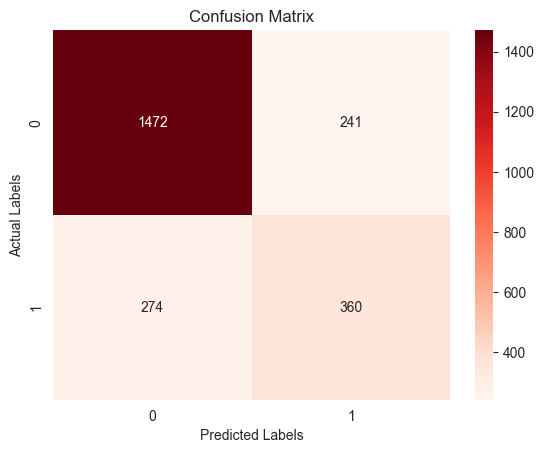

There are 41 features
Trees: 500, Max Depth: 41, Features: 41
Training Accuracy: 0.7527683134582623, Precision: 0.7202380952380952, Recall: 0.09797570850202429, F1: 0.17248752672843906
Testing Accuracy: 0.7477631018321261, Precision: 0.7142857142857143, Recall: 0.11041009463722397, F1: 0.1912568306010929
Accuracy: 74.78%


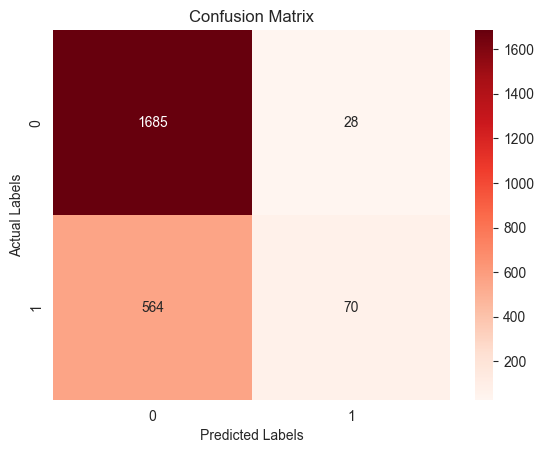

There are 41 features
Trees: 100, Max Depth: 4, Features: 41
Training Accuracy: 0.770442930153322, Precision: 0.5652535328345802, Recall: 0.5506072874493927, F1: 0.5578342904019689
Testing Accuracy: 0.7788666382616106, Precision: 0.5897035881435257, Recall: 0.5962145110410094, F1: 0.5929411764705882
Accuracy: 77.89%


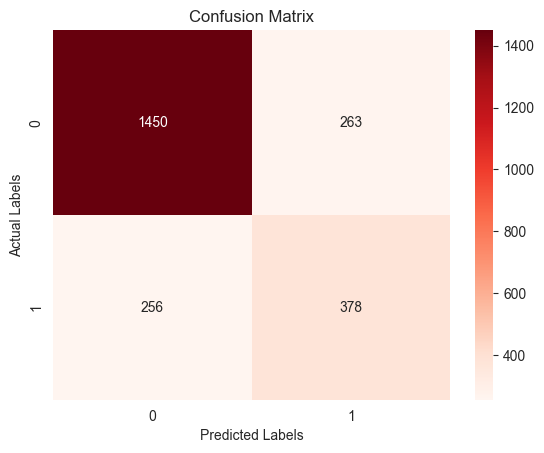

There are 6 features
Trees: 100, Max Depth: 6, Features: 6
Training Accuracy: 0.7617120954003407, Precision: 0.5379084967320261, Recall: 0.6663967611336032, F1: 0.5952983725135623
Testing Accuracy: 0.7682147422241159, Precision: 0.5556930693069307, Recall: 0.7082018927444795, F1: 0.622746185852982
Accuracy: 76.82%


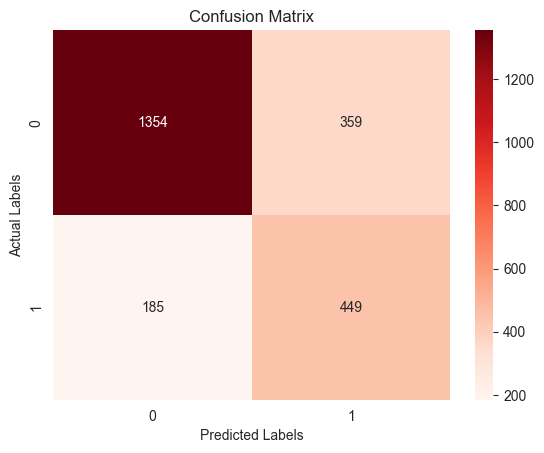

There are 6 features
Trees: 500, Max Depth: 6, Features: 6
Training Accuracy: 0.7732112436115843, Precision: 0.5736568457538995, Recall: 0.5360323886639676, F1: 0.5542067810799497
Testing Accuracy: 0.78014486578611, Precision: 0.5951612903225807, Recall: 0.582018927444795, F1: 0.5885167464114833
Accuracy: 78.01%


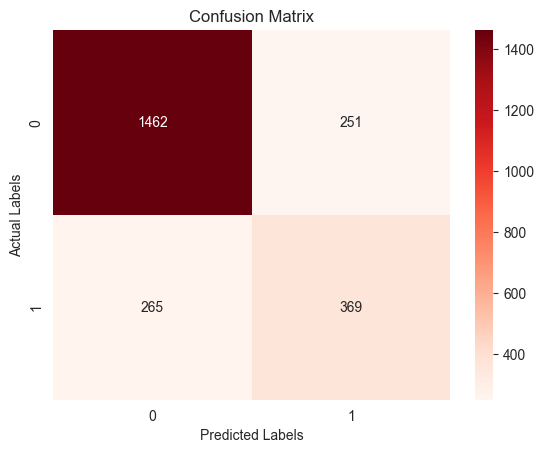

There are 21 features
Trees: 500, Max Depth: 21, Features: 21
Training Accuracy: 0.784923339011925, Precision: 0.6418663303909206, Recall: 0.4121457489878543, F1: 0.5019723865877712
Testing Accuracy: 0.7882403067746059, Precision: 0.6596736596736597, Recall: 0.44637223974763407, F1: 0.5324553151458137
Accuracy: 78.82%


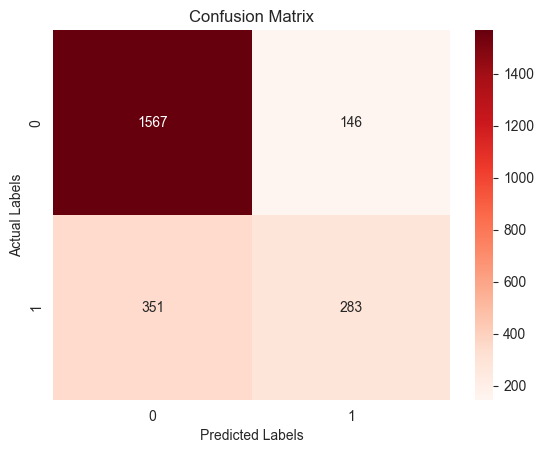

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot(confusionMatrix):
    sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Reds')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

def getConMat(valy, pred):
    labels = sorted(set(valy))
    n_labels = len(labels)
    confusionMatrix = [[0] * n_labels for _ in range(n_labels)]
    for true_label, predicted_label in zip(valy, pred):
        true_index = labels.index(true_label)
        pred_index = labels.index(predicted_label)
        confusionMatrix[true_index][pred_index] += 1
    acc = np.mean(pred == valy)
    print(f"Accuracy: {(acc*100):0.2f}%")
    return confusionMatrix

class TreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._predict(inputs, self.root) for inputs in X])

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        if num_samples >= self.min_samples_split and depth < self.max_depth:
            options = np.zeros(np.shape(X)[1]) # row vector for entropies
            for i in range(0,len(options)):
                options[i] = calcE(X=X[:,i], Y=y) # calculate avg weighted entropy for each feature
            best_feat = np.argmin(options)
            threshold = np.median(X[:, best_feat])
            left_indices = X[:, best_feat] < threshold
            right_indices = X[:, best_feat] >= threshold
            if np.sum(left_indices) > 0 and np.sum(right_indices) > 0:
                left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
                right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
                return TreeNode(feature_index=best_feat, threshold=threshold, left=left, right=right)
        return TreeNode(value=np.mean(y))

    def _predict(self, inputs, node):
        if node.value is not None:
            return int(node.value > 0.5)  # Ensure binary prediction
        if inputs[node.feature_index] < node.threshold:
            return self._predict(inputs, node.left)
        else:
            return self._predict(inputs, node.right)

class RandomForest:
    def __init__(self, n_estimators=100, min_samples_split=2, max_depth=10):
        self.n_estimators = n_estimators
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for i in range(self.n_estimators):
            # print('Tree ', i)
            tree = DecisionTree(self.min_samples_split, self.max_depth)
            indices = np.random.choice(len(X), 71)
            X_sample, y_sample = X[indices], y[indices]
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        votes = np.zeros(np.shape(X)[0])
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        # print(sum(tree_preds))
        # print('tree_preds is', np.shape(tree_preds), tree_preds)
        return np.mean(tree_preds, axis=0) >= 0.2


# Decision Tree Preprocessing
def DTpreprocess(delete=0):
    df = pd.read_csv('churn.csv')
    df = df.drop(columns = ['customerID'])
    # Convert all data to numeric
    df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce') # Convert 'TotalCharges' to numeric, forcing non-numeric values to NaN
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    medians = df[numerical_cols].median()
    # Fill missing values in numerical columns with their respective medians
    df[numerical_cols] = df[numerical_cols].fillna(medians)
    categorical_cols = df.select_dtypes(include=['object']).columns.drop(['Partner', 'Dependents', 'PhoneService', 'gender'])
    df = pd.get_dummies(df, columns=categorical_cols) # one-hot encoding on categorical columns
    df = pd.get_dummies(df, columns=['Partner', 'Dependents', 'PhoneService', 'gender'], drop_first=True) # change Yes/No columns to bools
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype('int')
    X = df.drop(columns = ['Churn']).to_numpy()
    Y = df['Churn'].to_numpy()
    cols = list(df.columns.drop('Churn'))
    X_train, X_val, Y_train, Y_val = custom_train_test_split(X=X, y=Y, test_size=1/3)
    m = np.atleast_2d(np.mean(X_train, axis=0)) # find mean of each column
    X_train = X_train - m
    X_train[X_train > 0] = 1 # turn all features into binary features
    X_train[X_train <= 0] = 0
    X_val = X_val - m # convert to binary features using training data means
    X_val[X_val > 0] = 1 # turn all features into binary features
    X_val[X_val <= 0] = 0
    # Delete features with the highest entropy
    entropy = []
    for i in range(0,X_train.shape[1]):
        E=calcE(X_train[:,i],Y_train)
        entropy.append(E)
    if delete >0:
        ind=np.argsort(entropy)[-delete:]
        X_train= np.delete(X_train, ind, axis=1)
        X_val= np.delete(X_val, ind, axis=1)
        cols = np.delete(cols, ind)
    print('There are', len(cols), 'features')
    return X_train, X_val, Y_train, Y_val, cols

def custom_train_test_split(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

def compute_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    precision = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_pred == 1) if np.sum(y_pred == 1) > 0 else 0
    recall = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_true == 1) if np.sum(y_true == 1) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return accuracy, precision, recall, f1

def RFmain(csv_path, trees=100, max_depth=41, delete_f=0):
    X_train, X_test, y_train, y_test, f = DTpreprocess(delete=delete_f)
    max_d = max_depth if max_depth <= X_train.shape[1] else X_train.shape[1]

    rf = RandomForest(n_estimators=trees, min_samples_split=2, max_depth=max_d)
    rf.fit(X_train, y_train)
    
    predictions_train = rf.predict(X_train)
    predictions_test = rf.predict(X_test)
    
    accuracy_train, precision_train, recall_train, f1_train = compute_metrics(y_train, predictions_train)
    accuracy_test, precision_test, recall_test, f1_test = compute_metrics(y_test, predictions_test)
    print(f"Trees: {trees}, Max Depth: {max_d}, Features: {len(f)}")
    print(f"Training Accuracy: {accuracy_train}, Precision: {precision_train}, Recall: {recall_train}, F1: {f1_train}")
    print(f"Testing Accuracy: {accuracy_test}, Precision: {precision_test}, Recall: {recall_test}, F1: {f1_test}")
    confusionMatrix = getConMat(y_test, np.round(predictions_test))
    plot(confusionMatrix)

def calcE(X, Y):
    # calculate avg weighted entropy for a vector X
    # print('Shape of X is ', np.shape(X), 'length of X is', len(X))
    epsilon = .0000001
    E = 0
    x0_y0 = 0
    x0_y1 = 0
    x1_y0 = 0
    x1_y1 = 0
    x0 = sum(X==0)
    x1 = sum(X==1)
    for i in range(0,np.shape(X)[0]):
        if X[i] == 0:
            if Y[i] == 0:
                x0_y0+=1
            else:
                x0_y1+=1
        else:
            if Y[i] == 1:
                x1_y0+=1
            else:
                x1_y1+=1
    if len(X) == 0 | x0 == 0 | x1 == 0:
        E = 5
    else:
        if x0 > 0:
            E0 = (x0/len(X))*( -1*(x0_y0/x0)*np.log2(x0_y0/x0 + epsilon) - (x0_y1/x0)*np.log2(x0_y1/x0 + epsilon))
        else:
            E0 = 1
        if x1 > 0:
            E1 = (x1/len(X))*( -1*(x1_y0/x1)*np.log2(x1_y0/x1 + epsilon) - (x1_y1/x1)*np.log2(x1_y1/x1 + epsilon))
        else:
            E1 = 1
        if max(E0, E1) >= 1:
            E = 1
        else:
            E = E0 + E1
    return E

# Adjust the file path accordingly
csv_path = 'churn.csv'
RFmain(csv_path, trees=100, max_depth=41)
RFmain(csv_path, trees=500, max_depth=41)
RFmain(csv_path, trees=100, max_depth=4)

RFmain(csv_path, trees=100, max_depth=41, delete_f=35)
RFmain(csv_path, trees=500, max_depth=41, delete_f=35)
RFmain(csv_path, trees=500, max_depth=41, delete_f=20)


**ENSEMBLE FOR LOGISTIC REGRESSION AND RANDOM FOREST:**

In [23]:
import numpy as np
import pandas as pd
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate, iterations):
    weights = np.zeros(X.shape[1])
    for i in range(iterations):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        weights -= learning_rate * gradient
    return weights

def predict_proba_lr(X, weights):
    return sigmoid(np.dot(X, weights))


def custom_train_test_split(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]


def DTpreprocess():
    df = pd.read_csv('churn.csv')
    df = df.drop(columns=['customerID'])
    df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    for col in numerical_cols:
        df[col].fillna(df[col].median(), inplace=True)

    categorical_cols = df.select_dtypes(include=['object']).columns.drop(['Partner', 'Dependents', 'PhoneService', 'gender'])
    df = pd.get_dummies(df, columns=categorical_cols) # one-hot encoding on categorical columns
    df = pd.get_dummies(df, columns=['Partner', 'Dependents', 'PhoneService', 'gender'], drop_first=True) # change Yes/No columns to bools
    
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype('int')
    
    df = pd.get_dummies(df)
    X = df.drop('Churn', axis=1).values
    y = df['Churn'].values

    X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test



def ensemble_predictions(lr_weights, rf_model, X):
    lr_probs = predict_proba_lr(X, lr_weights)
    # rf_probs = rf_model.predict_proba(X)
    rf_probs = rf_model.predict(X)
    avg_probs = (lr_probs + rf_probs) / 2
    return avg_probs >= 0.5


def compute_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    precision = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_pred == 1) if np.sum(y_pred == 1) > 0 else 0
    recall = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_true == 1) if np.sum(y_true == 1) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return accuracy, precision, recall, f1


def main():
    X_train, X_test, Y_train, Y_test = DTpreprocess()  # Adapt to use your preprocessing method

    lr_weights = logistic_regression(X_train, Y_train, learning_rate=0.01, iterations=1000)

    rf = RandomForest(n_estimators=100, min_samples_split=2, max_depth=10)
    rf.fit(X_train, Y_train)

    ensemble_preds = ensemble_predictions(lr_weights, rf, X_test)

    accuracy, precision, recall, f1 = compute_metrics(Y_test, ensemble_preds)
    # print(f'Ensemble Model Evaluation:\nAccuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

if __name__ == "__main__":
    main()


In [24]:
import matplotlib.pyplot as plt

def plot_log_loss(log_loss_history):
    plt.plot(log_loss_history)
    plt.title('Log Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.show()

def log_loss(h, y):
    return -(y * np.log(h) + (1 - y) * np.log(1 - h)).mean()

def logistic_regression(X, y, learning_rate, iterations):
    weights = np.zeros(X.shape[1])
    log_loss_history = []
    for i in range(iterations):
        z = np.dot(X, weights)
        h = sigmoid(z)
        loss = log_loss(h, y)
        log_loss_history.append(loss)
        gradient = np.dot(X.T, (h - y)) / y.size
        weights -= learning_rate * gradient
    return weights, log_loss_history




In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def getConMat(valy, pred):
    labels = sorted(set(valy))
    n_labels = len(labels)
    confusionMatrix = [[0] * n_labels for _ in range(n_labels)]
    for true_label, predicted_label in zip(valy, pred):
        true_index = labels.index(true_label)
        pred_index = labels.index(predicted_label)
        confusionMatrix[true_index][pred_index] += 1
    acc = np.mean(pred == valy)
    print(f"Accuracy: {(acc*100):0.2f}%")
    return confusionMatrix

def plot_confusion_matrix(y_true, y_pred):
    cm = getConMat(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

Ensemble Model Evaluation:
Accuracy: 0.7495, Precision: 0.7064, Recall: 0.1341, F1 Score: 0.2255
Accuracy: 74.95%


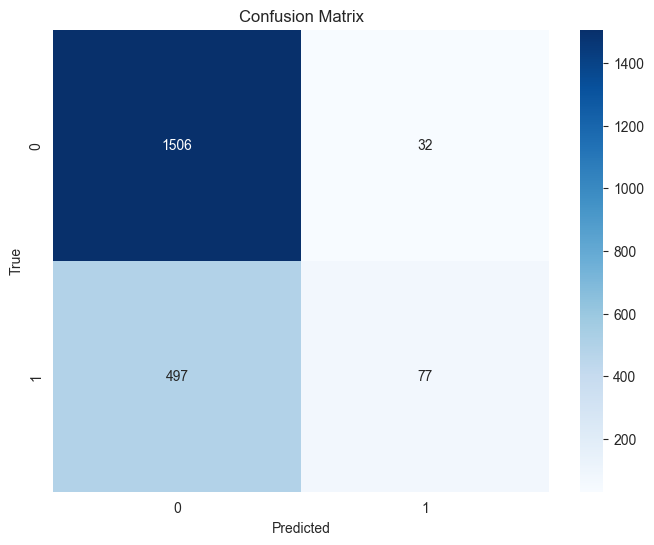

In [26]:
def main():
    X_train, X_test, Y_train, Y_test = DTpreprocess()
    
    lr_weights, log_loss_history = logistic_regression(X_train, Y_train, learning_rate=0.01, iterations=1000)
    # plot_log_loss(log_loss_history)
    
    rf = RandomForest(n_estimators=100, min_samples_split=2, max_depth=10)
    rf.fit(X_train, Y_train)
    
    ensemble_preds = ensemble_predictions(lr_weights, rf, X_test)
    
    accuracy, precision, recall, f1 = compute_metrics(Y_test, ensemble_preds)
    print(f'Ensemble Model Evaluation:\nAccuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
    
    plot_confusion_matrix(Y_test, ensemble_preds)

if __name__ == "__main__":
    main()


**COMPARISION BETWEEN MODELS:**

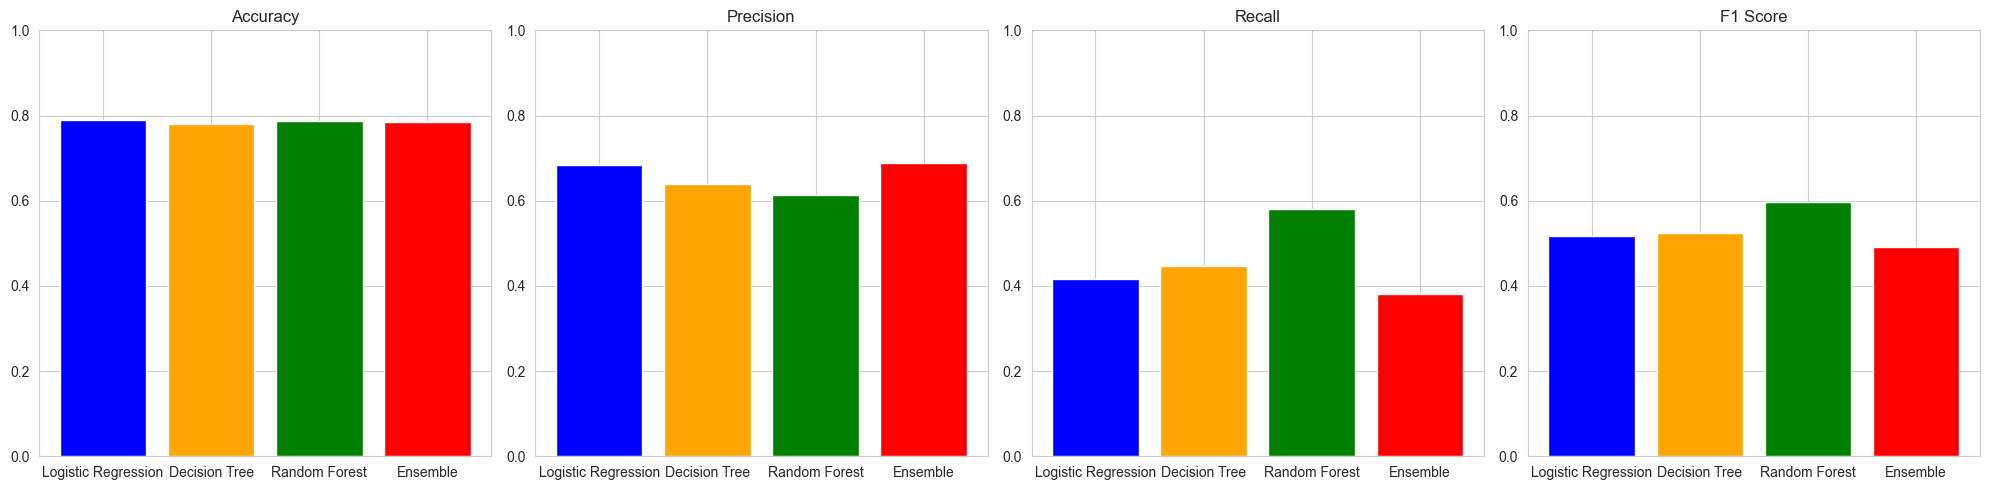

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def calcE(X, Y):
    epsilon = .0000001
    E = 0
    x0_y0 = 0
    x0_y1 = 0
    x1_y0 = 0
    x1_y1 = 0
    x0 = sum(X==0)
    x1 = sum(X==1)
    for i in range(0,np.shape(X)[0]):
        if X[i] == 0:
            if Y[i] == 0:
                x0_y0+=1
            else:
                x0_y1+=1
        else:
            if Y[i] == 1:
                x1_y0+=1
            else:
                x1_y1+=1
    if len(X) == 0 | x0 == 0 | x1 == 0:
        E = 5
    else:
        if x0 > 0:
            E0 = (x0/len(X))*( -1*(x0_y0/x0)*np.log2(x0_y0/x0 + epsilon) - (x0_y1/x0)*np.log2(x0_y1/x0 + epsilon))
        else:
            E0 = 1
        if x1 > 0:
            E1 = (x1/len(X))*( -1*(x1_y0/x1)*np.log2(x1_y0/x1 + epsilon) - (x1_y1/x1)*np.log2(x1_y1/x1 + epsilon))
        else:
            E1 = 1
        if max(E0, E1) >= 1:
            E = 1
        else:
            E = E0 + E1
    return E

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate, iterations):
    weights = np.zeros(X.shape[1])
    for i in range(iterations):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        weights -= learning_rate * gradient
    return weights

def predict_proba_lr(X, weights):
    return sigmoid(np.dot(X, weights))

def custom_train_test_split(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._predict(inputs, self.root) for inputs in X])

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        if num_samples >= self.min_samples_split and depth < self.max_depth:
            options = np.zeros(np.shape(X)[1]) 
            for i in range(0,len(options)):
                options[i] = calcE(X=X[:,i], Y=y) 
            best_feat = np.argmin(options)
            threshold = np.median(X[:, best_feat])
            left_indices = X[:, best_feat] < threshold
            right_indices = X[:, best_feat] >= threshold
            if np.sum(left_indices) > 0 and np.sum(right_indices) > 0:
                left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
                right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
                return TreeNode(feature_index=best_feat, threshold=threshold, left=left, right=right)
        return TreeNode(value=np.mean(y))

    def _predict(self, inputs, node):
        if node.value is not None:
            return int(node.value > 0.5)  
        if inputs[node.feature_index] < node.threshold:
            return self._predict(inputs, node.left)
        else:
            return self._predict(inputs, node.right)
        


class RandomForest:
    def __init__(self, n_estimators=100, min_samples_split=2, max_depth=10):
        self.n_estimators = n_estimators
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            tree = DecisionTree(self.min_samples_split, self.max_depth)
            indices = np.random.choice(len(X), len(X), replace=True)  
            X_sample, y_sample = X[indices], y[indices]
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_preds, axis=0) >= 0.2

    def predict_proba(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_preds, axis=0)  



def DTpreprocess():
    df = pd.read_csv('churn.csv')
    df = df.drop(columns=['customerID'])
    df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    for col in numerical_cols:
        df[col].fillna(df[col].median(), inplace=True)

    categorical_cols = df.select_dtypes(include=['object']).columns.drop(['Partner', 'Dependents', 'PhoneService', 'gender'])
    df = pd.get_dummies(df, columns=categorical_cols) # one-hot encoding on categorical columns
    df = pd.get_dummies(df, columns=['Partner', 'Dependents', 'PhoneService', 'gender'], drop_first=True) # change Yes/No columns to bools
    
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype('int')
    
    df = pd.get_dummies(df)
    X = df.drop('Churn', axis=1).values
    y = df['Churn'].values

    X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test


def ensemble_predictions(lr_weights, rf_model, X):
    lr_probs = predict_proba_lr(X, lr_weights)
    rf_probs = rf_model.predict_proba(X)  
    avg_probs = (lr_probs + rf_probs) / 2
    return avg_probs >= 0.5


def compute_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    precision = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_pred == 1) if np.sum(y_pred == 1) > 0 else 0
    recall = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_true == 1) if np.sum(y_true == 1) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return accuracy, precision, recall, f1


def evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name):
    if model_name == 'Logistic Regression':
        weights = logistic_regression(X_train, Y_train, learning_rate=0.01, iterations=1000)
        predictions = predict_proba_lr(X_test, weights) >= 0.5
    elif model_name == 'Ensemble':
        lr_weights = logistic_regression(X_train, Y_train, learning_rate=0.01, iterations=1000)
        rf_model = RandomForest(n_estimators=100, min_samples_split=2, max_depth=10)
        rf_model.fit(X_train, Y_train)
        predictions = ensemble_predictions(lr_weights, rf_model, X_test)
    else:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
    
    return compute_metrics(Y_test, predictions)


def main():
    X_train, X_test, Y_train, Y_test = DTpreprocess() 
    models = {
        'Logistic Regression': None,  
        'Decision Tree': DecisionTree(min_samples_split=2, max_depth=10),
        'Random Forest': RandomForest(n_estimators=100, min_samples_split=2, max_depth=10),
        'Ensemble': None  
    }
    
    results = {}
    for name in models:
        results[name] = evaluate_model(models[name], X_train, Y_train, X_test, Y_test, model_name=name)
        
    
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    fig, axs = plt.subplots(1, len(metrics), figsize=(20, 5))
    
    for i, metric in enumerate(metrics):
        axs[i].bar(results.keys(), [results[model][i] for model in models.keys()], color=['blue', 'orange', 'green', 'red'])
        axs[i].set_title(metric)
        axs[i].set_ylim(0, 1)
   
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()




# Observations:
**Performance Across Models**:

Random Forest showcased the highest recall and F1 Score, demonstrating its superior ability to identify churn customers accurately without excessively misclassifying non-churn customers. This model is adept at handling the complexity of the dataset and avoiding overfitting, which is a common pitfall of Decision Trees.

Logistic Regression had the highest accuracy and showed commendable performance across all metrics. Though, Random Forest had lower accuracy, it performed better overall. This model's strength lies in its simplicity and interpretability, which can be particularly useful when it is important to understand the drivers of churn.

The Decision Tree presented a straightforward model but with lower performance metrics than the Random Forest. It remains valuable for its interpretability and ease of implementation.

The Ensemble model did not exceed the performance of Random Forest or Logistic Regression. This indicates that the way the models were combined may not have been the most effective. The ensemble method's precision was notably high, but its recall was lacking, suggesting it may not identify as many actual churn cases as Random Forest.

**Precision and Recall Trade-off**:

Despite the high precision of the Ensemble model, its low recall suggests it is less suitable for scenarios where it is critical to capture as many true churn cases as possible. Random Forest, with its balanced recall and precision reflected in the F1 Score, would be preferable in scenarios where both identifying churners and avoiding false churn predictions are important. 

**F1 Score**:

Random Forest achieved the highest F1 Score, indicating it maintained a balance between recall and precision. This suggests that Random Forest is the most suitable model for our churn prediction task since it captures the harmonic mean of precision and recall, essential for our dataset.

# Conclusion:

The evaluation of our churn prediction models reveals that the Random Forest algorithm offers the most balanced performance, with the highest F1 Score indicating its proficiency in accurately predicting churn. Despite Logistic Regression's high precision and interpretability, which provides clear insights for strategic decision-making, it falls short in achieving the best balance between precision and recall.

The Ensemble model did not outperform its individual counterparts, suggesting that more advanced techniques like weighted voting or stacking might be needed to fully capitalize on the strengths of different models.

The study also notes that feature quality significantly impacts model performance. Specifically, noisy and high-entropy features reduced the efficacy of both the Logistic Regression and Decision Tree models. Through entropy-based feature selection and meticulous parameter tuning, improvements were noted, although this process proved to be time-consuming.

Considering the complexities and financial implications of customer retention, our findings suggest adopting the Random Forest model as it aligns well with the need for an accurate and reliable churn prediction model. Continuous refinement and adaptation of this model are recommended to ensure its efficacy as customer behaviors and market conditions evolve.

Moreover, model performance should be regularly validated with new data and across different customer segments to maintain a robust churn prediction system. The effectiveness of any model may fluctuate based on dataset characteristics and demographic variances, underlining the necessity for persistent testing and adaptation in our churn prediction strategy.